<a href="https://colab.research.google.com/github/bhushanmandava/PyTorch_fundamentals/blob/main/FENN_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from sklearn.datasets import fetch_openml

In [5]:
boston =fetch_openml(name='boston')

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [7]:
boston.frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
x,y= boston.data,boston.target

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [20]:
x_train

tensor([[ 1.3278, -0.4877,  1.0160,  ...,  0.8066, -0.0789,  1.7181],
        [-0.3475, -0.4877, -0.4373,  ...,  1.1765,  0.4270, -0.5864],
        [-0.4165,  1.0145, -0.7407,  ..., -0.7192,  0.0611, -0.6761],
        ...,
        [-0.4188,  2.9458, -1.3317,  ..., -0.6730,  0.3757, -0.9340],
        [ 0.8783, -0.4877,  1.0160,  ...,  0.8066, -2.7063,  1.4882],
        [-0.3939, -0.4877, -0.3760,  ...,  1.1302, -3.1344, -0.2836]])

In [21]:
y_train

tensor([[12.0000],
        [19.9000],
        [19.4000],
        [13.4000],
        [18.2000],
        [24.6000],
        [21.1000],
        [24.7000],
        [ 8.7000],
        [27.5000],
        [20.7000],
        [36.2000],
        [31.6000],
        [11.7000],
        [39.8000],
        [13.9000],
        [21.8000],
        [23.7000],
        [17.6000],
        [24.4000],
        [ 8.8000],
        [19.2000],
        [25.3000],
        [20.4000],
        [23.1000],
        [37.9000],
        [15.6000],
        [45.4000],
        [15.7000],
        [22.6000],
        [14.5000],
        [18.7000],
        [17.8000],
        [16.1000],
        [20.6000],
        [31.6000],
        [29.1000],
        [15.6000],
        [17.5000],
        [22.5000],
        [19.4000],
        [19.3000],
        [ 8.5000],
        [20.6000],
        [17.0000],
        [17.1000],
        [14.5000],
        [50.0000],
        [14.3000],
        [12.6000],
        [28.7000],
        [21.2000],
        [19.

In [45]:
import torch.nn as nn
class FENN(nn.Module):
  def __init__(self,input_dim,hidden_dim,output_dim):
    super(FENN,self).__init__()
    self.fc1=nn.Linear(input_dim,hidden_dim)
    self.fc2=nn.Linear(hidden_dim,output_dim)
    # self.relu=nn.ReLU()

  def forward(self,x):
    out=self.fc1(x)
    out=self.fc2(out)
    return out

In [47]:
input_dim=x_train.shape[1]
hidden_dim=64
output_dim=1

In [48]:
model = FENN(input_dim, hidden_dim, output_dim)

In [49]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [50]:
num_epochs = 100
loss_values = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(x_train)  # Perform the forward pass
    loss = criterion(outputs, y_train)  # Compute the loss
    loss.backward()  # Perform the backward pass (compute gradients)
    optimizer.step()  # Update the weights
    loss_values.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 542.5898
Epoch [20/100], Loss: 438.7444
Epoch [30/100], Loss: 303.3444
Epoch [40/100], Loss: 169.3604
Epoch [50/100], Loss: 78.7922
Epoch [60/100], Loss: 40.1916
Epoch [70/100], Loss: 28.5223
Epoch [80/100], Loss: 25.2549
Epoch [90/100], Loss: 24.1421
Epoch [100/100], Loss: 23.6121


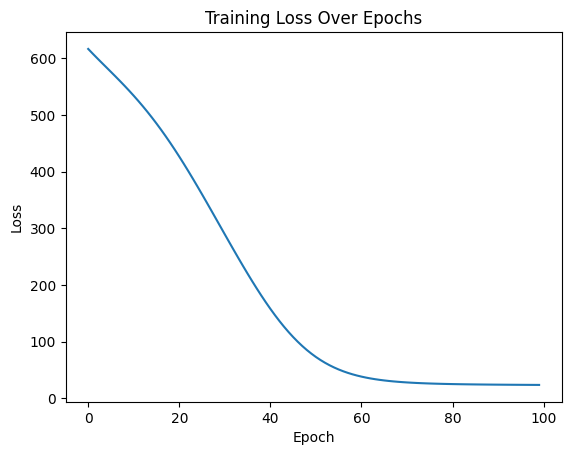

In [51]:
import matplotlib.pyplot as plt

plt.plot(range(num_epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()